# Car Price Prediction Model

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import  datetime


## Exploratory Data Analysis

In [3]:
df = pd.read_csv("car.csv")

In [4]:
df.head(10)

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399
5,15,Hyundai,2012,500000,53000,Diesel,Individual,Manual,Second Owner,5,90.00,kmpl,23.00,1396
6,16,Maruti,2002,150000,80000,Petrol,Individual,Manual,Second Owner,5,46.30,kmpl,19.70,796
7,17,Hyundai,2016,680000,100000,Diesel,Individual,Manual,First Owner,5,88.73,kmpl,22.54,1396
8,18,Mahindra,2011,174000,100000,Diesel,Individual,Manual,Second Owner,5,64.10,kmpl,21.00,1461
9,21,Maruti,2012,600000,72000,Diesel,Individual,Manual,First Owner,5,88.80,kmpl,21.50,1248


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2095 non-null   int64  
 1   name                2095 non-null   object 
 2   year                2095 non-null   int64  
 3   selling_price       2095 non-null   int64  
 4   km_driven           2095 non-null   int64  
 5   fuel                2095 non-null   object 
 6   seller_type         2095 non-null   object 
 7   transmission        2095 non-null   object 
 8   owner               2095 non-null   object 
 9   seats               2095 non-null   int64  
 10  max_power (in bph)  2095 non-null   float64
 11  Mileage Unit        2095 non-null   object 
 12  Mileage             2095 non-null   float64
 13  Engine (CC)         2095 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 229.3+ KB


In [6]:
df.describe()

,Unnamed: 0,year,selling_price,km_driven,seats,max_power (in bph),Mileage,Engine (CC)
count,2095.000000,2095.000000,2.095000e+03,2095.000000,2095.000000,2095.000000,2095.000000,2095.000000
mean,3155.537947,2014.052506,4.272799e+05,67413.593795,5.096897,77.410427,21.397928,1205.078282
std,1791.039215,3.273451,2.326698e+05,41580.846333,0.457000,19.884938,1.209234,245.058696
min,0.000000,2000.000000,4.595700e+04,1000.000000,4.000000,35.000000,19.600000,624.000000
25%,1589.500000,2012.000000,2.500000e+05,35000.000000,5.000000,67.040000,20.360000,998.000000
50%,3185.000000,2014.000000,3.900000e+05,60000.000000,5.000000,74.000000,21.100000,1248.000000
75%,4709.500000,2017.000000,5.555000e+05,90000.000000,5.000000,88.730000,22.540000,1396.000000
max,6256.000000,2020.000000,1.594000e+06,270000.000000,8.000000,126.320000,23.590000,1598.000000


In [7]:
df.isnull().any()

Unnamed: 0            False
name                  False
year                  False
selling_price         False
km_driven             False
fuel                  False
seller_type           False
transmission          False
owner                 False
seats                 False
max_power (in bph)    False
Mileage Unit          False
Mileage               False
Engine (CC)           False
dtype: bool

In [8]:
df.shape

(2095, 14)

In [9]:
df.columns

Index(['Unnamed: 0', 'name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'seats', 'max_power (in bph)',
       'Mileage Unit', 'Mileage', 'Engine (CC)'],
      dtype='object')

In [10]:
df.isnull().sum()

Unnamed: 0            0
name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
seats                 0
max_power (in bph)    0
Mileage Unit          0
Mileage               0
Engine (CC)           0
dtype: int64

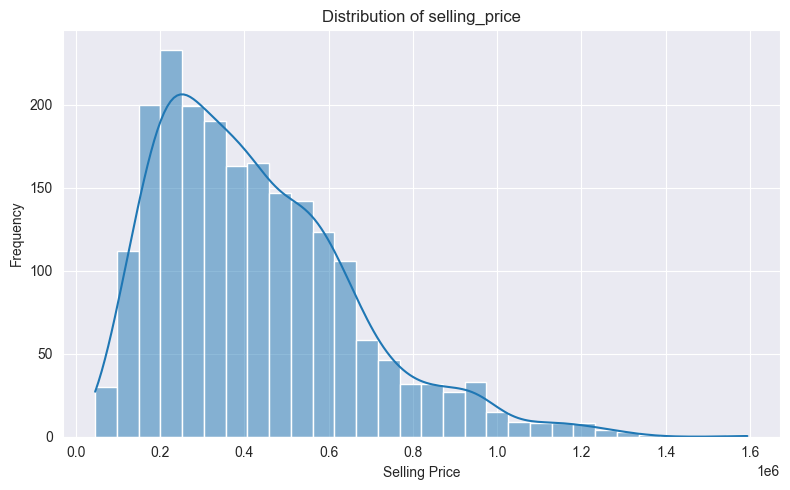

In [11]:
# Distribution of target variable (e.g. Selling_Price)
plt.figure(figsize=(8, 5))
sns.histplot(df['selling_price'], kde=True, bins=30)
plt.title('Distribution of selling_price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

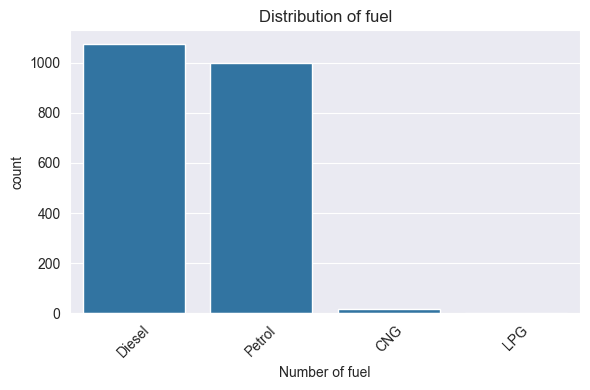

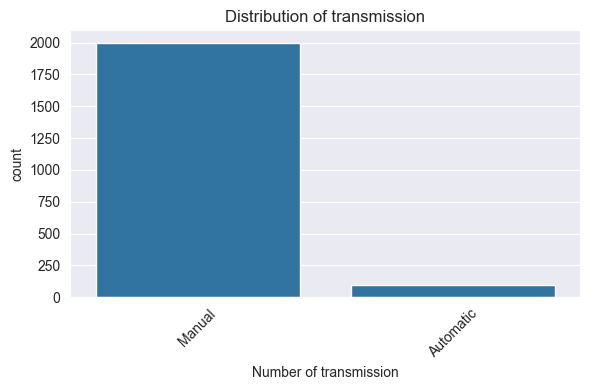

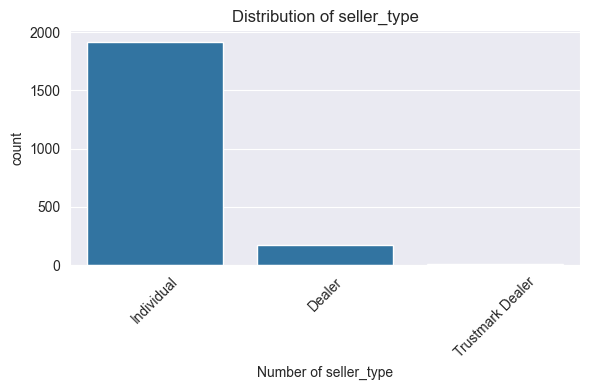

In [12]:
# Count plots for categorical features
categorical_cols = ['fuel', 'transmission', 'seller_type']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title('Distribution of ' + col)
    plt.xticks(rotation=45)
    plt.xlabel('Number of ' + col)
    plt.tight_layout()
    plt.show()


In [13]:
df['selling_price'].describe()


count    2.095000e+03
mean     4.272799e+05
std      2.326698e+05
min      4.595700e+04
25%      2.500000e+05
50%      3.900000e+05
75%      5.555000e+05
max      1.594000e+06
Name: selling_price, dtype: float64

<Axes: >

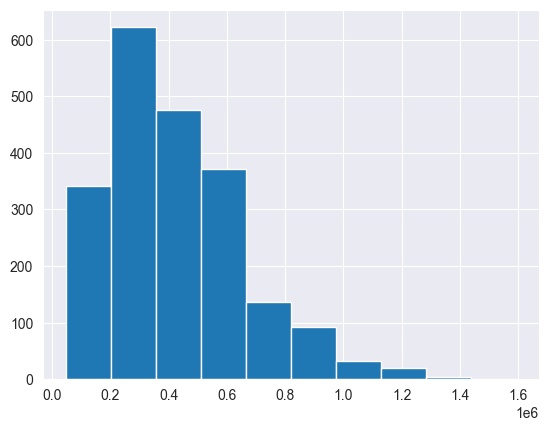

In [14]:
df['selling_price'].hist()


{'whiskers': [<matplotlib.lines.Line2D at 0x12f1e6850>,
 'caps': [<matplotlib.lines.Line2D at 0x12f1e6ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12f1e6710>],
 'medians': [<matplotlib.lines.Line2D at 0x12f1e6d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x12f1e6e90>],
 'means': []}

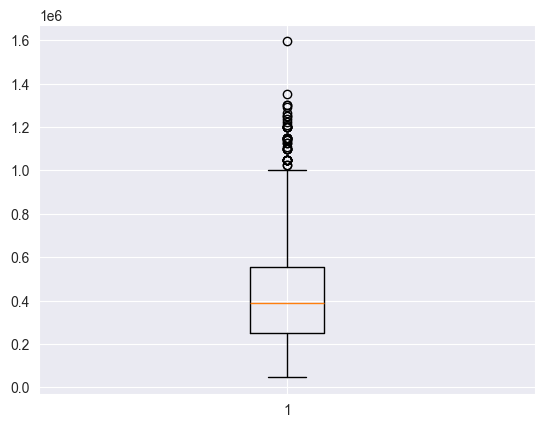

In [15]:
plt.boxplot(df['selling_price'])

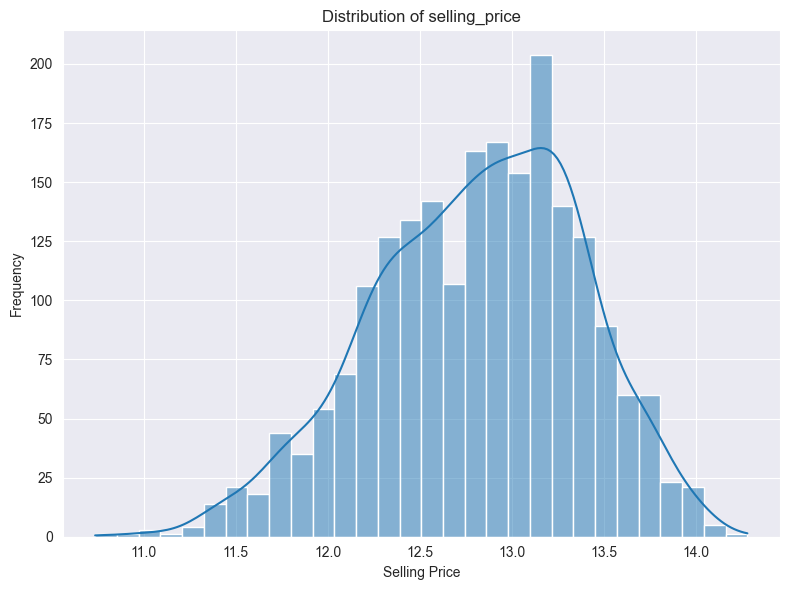

In [17]:
#Log Transform the selling price
df['selling_price'] = np.log1p(df['selling_price'])
plt.figure(figsize=(8, 6))
sns.histplot(df['selling_price'], kde=True, bins=30)
plt.title('Distribution of selling_price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [18]:
# removing irrelevant columns
df = df.drop(['Unnamed: 0', 'name'], axis=1)

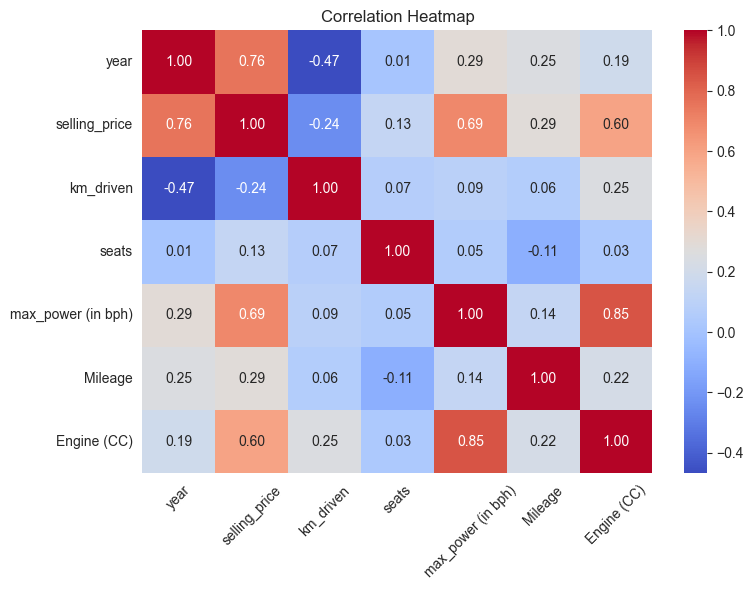

In [19]:
 # Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8, 6))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
df['age'] = datetime.now().year - df['year']
df.drop(['year'], axis=1, inplace=True)

### Feature Selection

In [24]:
numerical_features = [
    'age',              # 0.76 - very strong
    'max_power (in bph)', # 0.69 - strong
    'km_driven',         # -0.24 - weak but meaningful
    'Mileage'            # 0.29 - moderate
]
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']

### Preprocessing

In [27]:
X = df[numerical_features + categorical_features]
y = df['selling_price']

X = df.drop(['selling_price'], axis=1)

### Train Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

### Using Pipelines for preprocessing and model

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline( steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

model = Pipeline(steps = [
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor())
])

model.fit(X_train, y_train)


y_pred = model.predict(X_test)



### Mean Squared Error

In [50]:
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred)

mse = mean_squared_error(y_pred_original, y_test_original)
mae = mean_absolute_error(y_pred_original, y_test_original)
r2_log = r2_score(y_pred_original, y_test_original)
print(f"Mean Square error {mse:.2f}")
print(f"Mean Absolute error {mae:.2f}")
print(f"R2 score {r2_log:.2f}")

Mean Square error 4705409169.35
Mean Absolute error 48175.87
R2 score 0.89


### Selecting best performance model

In [ ]:
from sklearn.model_selection import KFold


def evaluate_model(model, X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


    best=0
    fold=1
    for train_index, test_index in kf.split(X):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[train_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]


        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_test_fold)

        mse = mean_squared_error(y_test_fold, y_pred)
        mae = mean_absolute_error(y_test_fold, y_pred)
        r2 = r2_score(y_test_fold, y_pred)

        print(f"Fold {fold}:")
        print(f"  MSE: {mse:.2f}")
        print(f"  MAE: {mae:.2f}")
        print(f"  R2: {r2:.4f}\n")
        fold += 1

